### setup notebook

In [1]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

Conda Environment: roicat


In [23]:
from pathlib import Path

import natsort
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [3]:
%load_ext autoreload
%autoreload 2
import bnpm

In [4]:
path_TCA = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/run_20230701/factors_refit/20230504/TCA.h5'

In [5]:
data_TCA = bnpm.h5_handling.simple_load(path_TCA, return_dict=True, verbose=True)

==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/run_20230701/factors_refit/20230504/TCA.h5" ====
1. factors_rearranged:----------------
  1. 0:----------------
    1. (xy points):    shape=(1872, 10) ,  dtype=float32
    2. frequency:    shape=(36, 10) ,    dtype=float32
    3. time:        shape=(21729, 10) , dtype=float32


In [7]:
val_tca__idx_tca = data_TCA['factors_rearranged']['0']['time']

In [8]:
path_VQT = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/run_20230701/20230504/jobNum_0/analysis_files/VQT_Analyzer.h5'

In [9]:
data_VQT = bnpm.h5_handling.simple_load(path_VQT, return_dict=False, verbose=True)

1. VQT:----------------
  1. filters:       shape=(36, 501) ,   dtype=complex64
  2. wins:          shape=(36, 501) ,   dtype=float32
2. frequencies:     shape=(36,) ,       dtype=float64
3. point_positions:    shape=(1872,) ,     dtype=float32
4. spectrograms:----------------
  1. 0:             shape=(2, 936, 36, 21729) ,dtype=float32
5. x_axis:----------------
  1. 0:             shape=(21729,) ,    dtype=float32


In [10]:
val_camIdx__idx_tca = data_VQT['x_axis']['0'][:]

In [11]:
path_camCSV = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/cam4_CSVs/20230504/times_cam42023-05-04T14_13_24.csv'

In [52]:
path_camCSV = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/times_cam32023-04-27T11_29_15.csv'

In [53]:
csv = pd.read_csv(filepath_or_buffer=path_camCSV, delimiter=',', header=None)

In [54]:
val_camFrameNumModulus__idx_camCSV = csv[2].to_numpy().astype(np.int64)

In [55]:
val_camFrameTime__idx_camCSV = bnpm.indexing.moduloCounter_to_linearCounter(val_camFrameNumModulus__idx_camCSV, modulus=2**32, plot_pref=False)

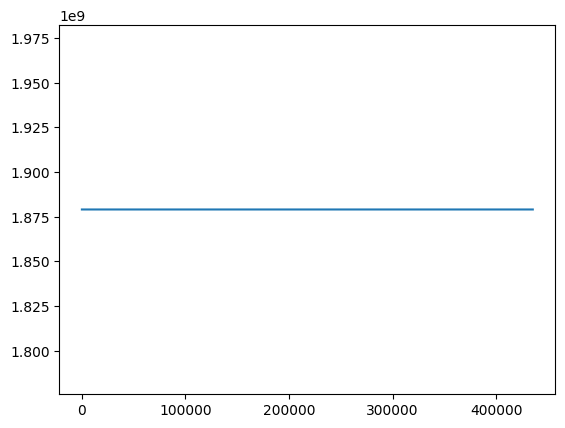

In [56]:
plt.figure()
plt.plot(csv[0])

In [33]:
csv

,0,1,2,3,4
0,1879048192,423779425,1300658179,1300658179,2023-05-04T14:13:25.3660416
1,1879048192,423779426,1300931598,1300931598,2023-05-04T14:13:25.3772288
2,1879048192,423779427,1301204993,1301204993,2023-05-04T14:13:25.3826560
3,1879048192,423779428,1301477404,1301477404,2023-05-04T14:13:25.3910912
4,1879048192,423779429,1301750823,1301750823,2023-05-04T14:13:25.3994368
...,...,...,...,...,...
435063,1879048192,424214488,2698798692,2698798692,2023-05-04T15:13:50.9852544
435064,1879048192,424214489,2699072111,2699072111,2023-05-04T15:13:50.9932288
435065,1879048192,424214490,2699344498,2699344498,2023-05-04T15:13:51.0015488
435066,1879048192,424214491,2699617917,2699617917,2023-05-04T15:13:51.0097792


In [24]:
path_ws = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230504/exp_0001.h5'

In [25]:
ws = bnpm.h5_handling.simple_load(path_ws, return_dict=True)

In [32]:
val_wsPulse__idx_ws = ws['sweep_0001']['analogScans'][0]

In [ ]:
val

In [19]:
val_camFrameTime__idx_tca = scipy.interpolate.interp1d(
    x=np.arange(val_camFrameTime__idx_camCSV.shape[0]),
    y=val_camFrameTime__idx_camCSV,
    kind='linear',
    axis=0,
    bounds_error=False,
)(val_camIdx__idx_tca)

### import core library

### import files

In [5]:
from pathlib import Path

dir_S2p             = Path(r'/media/rich/bigSSD/res2p/scanimage data/round 5 experiments/mouse 2_6/20210417/suite2p/plane0')

dir_ROIClassifier   = Path(r'/media/rich/bigSSD/res2p/scanimage data/round 5 experiments/mouse 2_6/20210418/analysis_lastNight')

dir_ws              = Path(r'/media/rich/bigSSD/res2p/wavesurfer data/round 5 experiments/mouse 2_6/20210417')
fileName_ws         = Path(r'exp_0001.h5')

dir_cameraCSV       = Path(r'/media/rich/bigSSD/res2p/Camera data/round 5 experiments/mouse 2_6/20210417/cam3/experiment')
fileName_cameraCSV  = Path(r'times_cam32021-04-18T00_41_02.csv')

dir_faceRhythm      = Path(r'/media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/data')
fileName_faceRhythm = Path('factors_spectral_temporal_interp2.npy')

In [6]:
F , Fneu , iscell , ops , spks , stat , num_frames_S2p = import_data.import_S2p(dir_S2p)

IsCell_ROIClassifier , ROI_Classifier_manual_selection_vars = import_data.import_roiClassifier(dir_ROIClassifier)

ws_data = import_data.import_ws(dir_ws / fileName_ws)

cameraCSV , signal_GPIO = import_data.import_cameraCSV(dir_cameraCSV / fileName_cameraCSV)

temporalFactors_faceRhythm = import_data.import_temporalFactorsFR(dir_faceRhythm / fileName_faceRhythm)

FileNotFoundError: [Errno 2] No such file or directory: '/media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/data/factors_spectral_temporal_interp2.npy'

### align data

In [7]:
%load_ext autoreload
%autoreload 2
from NBAP import align_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
## == ALIGN DATA ==
%matplotlib inline

plot_pref = False

ws_galvoFlyBackTrace = ws_data[6,:] 
ws_YGalvoFlybacks_bool_wsTime, ws_frameTimes_wsTime, ws_samples_per_S2p_frame_rough = align_data.align_ws_toS2p(ws_galvoFlyBackTrace,
                                                                                                                num_frames_S2p,
                                                                                                                plot_pref)

ws_licks = ws_data[3,:]
thresh_licks = -0.2
ws_licks_bool_wsTime, ws_licks_bool_S2pInd, ws_lickTimes_S2pInd = align_data.align_licks_toS2p(ws_licks,
                                                                                               thresh_licks,
                                                                                               ws_frameTimes_wsTime,
                                                                                               num_frames_S2p,
                                                                                               plot_pref)

ws_rewards = ws_data[4,:]
thresh_rewards = 1
ws_rewards_bool_wsTime, ws_rewards_bool_S2pInd, ws_rewardTimes_S2pInd = align_data.align_rewards_toS2p(ws_rewards,
                                                                                                       thresh_rewards,
                                                                                                       ws_frameTimes_wsTime,
                                                                                                       num_frames_S2p,
                                                                                                       plot_pref)

ws_treadmill = ws_data[2,:]
ws_treadmill_S2pInd = align_data.align_treadmill_toS2p(ws_treadmill,
                                                       ws_frameTimes_wsTime,
                                                       num_frames_S2p,
                                                       ws_samples_per_S2p_frame_rough,
                                                       plot_pref)

signal_GPIO_bool_camTime , signal_GPIO_camTimes = align_data.extract_camPulses_camIdx(signal_GPIO,
                                                                                      plot_pref)

ws_camPulses = ws_data[0,:]
ws_camSignal_bool_wsTime , ws_camSignal_wsTimes = align_data.align_ws_camPulses_toWS(ws_camPulses,
                                                                                     plot_pref)

camTimeDates = cameraCSV[:,3]
camTimes_absolute = align_data.convert_camTimeDates_toAbsoluteSeconds(camTimeDates)

camTimes_wsInd, camTimes_wsInd_rounded, first_camPulse_camIdx, last_camPulse_camIdx = align_data.align_camFrames_toWS(signal_GPIO_camTimes,
                                                                                                                      camTimes_absolute,
                                                                                                                      ws_camSignal_wsTimes)

camSignal_s2pInd , first_s2pIdx_usable = align_data.align_camSignal_toS2p_andToWS(temporalFactors_faceRhythm,
                                                                                  camTimes_wsInd,
                                                                                  len(signal_GPIO),
                                                                                  ws_frameTimes_wsTime,
                                                                                  first_camPulse_camIdx,
                                                                                  last_camPulse_camIdx,
                                                                                  downsample_factor=None,
                                                                                  plot_pref=False)

frames in scanimage movie = 108000
frames from ws galvo extraction movie = 108000
number of wavesurfer samples per imaging frame:  33.36288888888889
Completed aligning WS to S2p. Total elapsed time: 0.02 seconds
Completed aligning Licks to S2p. Total elapsed time: 4.39 seconds
Completed aligning Rewards to S2p. Total elapsed time: 4.29 seconds
Completed aligning Treadmill to S2p. Total elapsed time: 0.34 seconds
Completed extracting camera pulses from camera data. Total elapsed time: 0.02 seconds
Completed aligning camera pulses to S2p. Total elapsed time: 0.02 seconds
Completed aligning camera frames to wavesurfer. Total elapsed time: 0.0 seconds


NameError: name 'temporalFactors_faceRhythm' is not defined

### visualize the wavesurfer data

In [ ]:
# show wavesurfer data
from matplotlib import pyplot as plt

%matplotlib notebook
fig , axs = plt.subplots(ws_data.shape[0] , sharex=True)
for ii in range(ws_data.shape[0]):
    axs[ii].plot(ws_data[ii,:] , linewidth=0.2)

# Saving and Loading

### Saving

In [9]:
import datetime
import numpy as np

signals_S2pAligned = {
    "ws_licks_bool_S2pInd": ws_licks_bool_S2pInd,
    "ws_rewards_bool_S2pInd": ws_rewards_bool_S2pInd,
    "ws_treadmill_S2pInd": ws_treadmill_S2pInd,
    "ws_rewards_bool_S2pInd": ws_rewards_bool_S2pInd,
    "camSignal_s2pInd": camSignal_s2pInd,
}

alignment_data = {
    "ws_YGalvoFlybacks_bool_wsTime": ws_YGalvoFlybacks_bool_wsTime,
    "ws_frameTimes_wsTime": ws_frameTimes_wsTime,
    "ws_samples_per_S2p_frame_rough": ws_samples_per_S2p_frame_rough,
    
    "thresh_licks": thresh_licks,
    "ws_licks_bool_wsTime": ws_licks_bool_wsTime,
    "ws_licks_bool_S2pInd": ws_licks_bool_S2pInd,
    "ws_lickTimes_S2pInd": ws_lickTimes_S2pInd,
    
    "thresh_rewards": thresh_rewards,
    "ws_rewards_bool_wsTime": ws_rewards_bool_wsTime,
    "ws_rewards_bool_S2pInd": ws_rewards_bool_S2pInd,
    "ws_rewardTimes_S2pInd": ws_rewardTimes_S2pInd,
    
    "ws_treadmill_S2pInd": ws_treadmill_S2pInd,
    
    "signal_GPIO_bool_camTime": signal_GPIO_bool_camTime,
    "signal_GPIO_camTimes": signal_GPIO_camTimes,
    
    "ws_camSignal_bool_wsTime": ws_camSignal_bool_wsTime,
    "ws_camSignal_wsTimes": ws_camSignal_wsTimes,
    
    "camTimes_absolute": camTimes_absolute,
    
    "camTimes_wsInd": camTimes_wsInd,
    "camTimes_wsInd_rounded": camTimes_wsInd_rounded,
    "first_camPulse_camIdx": first_camPulse_camIdx,
    "last_camPulse_camIdx": last_camPulse_camIdx,
    
    "camSignal_s2pInd": camSignal_s2pInd,
    "first_s2pIdx_usable": first_s2pIdx_usable,
    "date_now": np.array(datetime.datetime.now() , dtype='datetime64')
}

NameError: name 'camSignal_s2pInd' is not defined

In [11]:
from pathlib import Path

dir_save = Path('/media/rich/bigSSD/analysis_data/mouse 2_6/20210409/postHoc_analysis') 

fileName_save = 'signals_S2pAligned'
fileSuffix_save = '.npy'
path_save = dir_save / (fileName_save + fileSuffix_save)
print(f'Saving to: {path_save}')
np.save(path_save , signals_S2pAligned)

fileName_save = 'alignment_data'
fileSuffix_save = '.npy'
path_save = dir_save / (fileName_save + fileSuffix_save)
print(f'Saving to: {path_save}')
np.save(path_save , alignment_data)

Saving to: /media/rich/bigSSD/analysis_data/mouse 2_6/20210409/postHoc_analysis/signals_S2pAligned.npy
Saving to: /media/rich/bigSSD/analysis_data/mouse 2_6/20210409/postHoc_analysis/alignment_data.npy


### Loading

In [12]:
from pathlib import Path
import numpy as np

dir_load = Path('/media/rich/bigSSD/analysis_data/mouse 2_6/20210417/postHoc_analysis')
fileName_load = 'alignment_data'
fileSuffix_load = '.npy'
path_load = dir_load / (fileName_load + fileSuffix_load)
# path_load = dir_load / fileName_load

alignment_data = np.load(path_load , allow_pickle=True)

# this line of code is reckless but useful. It imports all of the key-value pairs in a dict as variables
locals().update(alignment_data[()])

---
---

# Optional: align camera tensor (face-rhythm tensor) to S2p

### Import .nwb

In [10]:
%load_ext autoreload
%autoreload 2
from NBAP import helpers

import pynwb
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
nwb_path = r'/media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/data/session.nwb'

In [12]:
helpers.dump_nwb(nwb_path)

CQT
     Sxx_allPixels:    (1498, 32, 27288, 2)   ,  float32   ,   10.464621 GB
     Sxx_allPixels_norm:    (1498, 32, 27288, 2)   ,  float32   ,   10.464621 GB
     Sxx_allPixels_normFactor:    (27288, 2)   ,  float32   ,   0.000218 GB
     Sxx_xAxis:    (436601,)   ,  float64   ,   0.003493 GB
     freq_idx_toUse:    (40,)   ,  bool   ,   0.0 GB
     freqs_Sxx:    (200,)   ,  float64   ,   2e-06 GB
     freqs_Sxx_all:    (40,)   ,  float64   ,   0.0 GB
     freqs_Sxx_toUse:    (32,)   ,  float64   ,   0.0 GB
Optic Flow
     color_tuples:    (253197, 3)   ,  float64   ,   0.006077 GB
     displacements:    (3960, 2, 436601)   ,  float64   ,   27.663039 GB
     pointInds_toUse:    (3960, 1, 2)   ,  float32   ,   3.2e-05 GB
     positions_cleanup:    (3960, 2, 436601)   ,  float64   ,   27.663039 GB
     positions_cleanup_absolute:    (3960, 2, 436601)   ,  float64   ,   27.663039 GB
     positions_convDR_absolute:    (1498, 2, 436601)   ,  float64   ,   10.464453 GB
     positions_conv

<IPython.core.display.Javascript object>


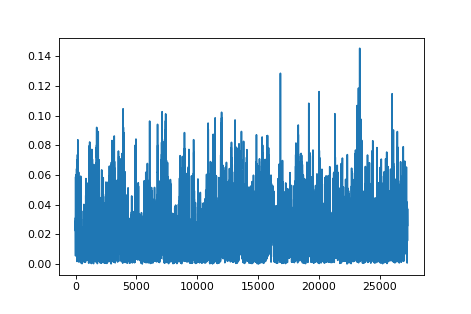

In [13]:
with pynwb.NWBHDF5IO(nwb_path, 'r') as io:
    nwbfile = io.read()
    
    face_array = np.array(nwbfile.processing['Face Rhythm']['CQT']['Sxx_allPixels_norm'].data)
    face_array = np.concatenate((face_array[...,0], face_array[...,1]), axis=0)
#     face_tensor = torch.tensor(nwbfile.processing['Face Rhythm']['CQT']['Sxx_allPixels_norm'].data, dtype=torch.float32, device='cpu')
#     face_tensor = torch.tensor(nwbfile.processing['Face Rhythm']['CQT']['Sxx_allPixels_norm'].data, dtype=torch.float32)
    plt.figure()
    plt.plot(face_array[0,0,:])

## Perform alignment

In [ ]:
faceArray_s2pInd_ds , first_s2pIdx_usable = align_data.align_camSignal_toS2p_andToWS(face_array[:,:,:].transpose(2,0,1),
                                                                                  camTimes_wsInd,
                                                                                  len(signal_GPIO),
                                                                                  ws_frameTimes_wsTime,
                                                                                  first_camPulse_camIdx,
                                                                                  last_camPulse_camIdx,
                                                                                  downsample_factor=4,
                                                                                  plot_pref=False)

In [10]:
%load_ext autoreload
%autoreload 2

from basic_neural_processing_modules import h5_handling
import h5py
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
h5_handling.write_dict_to_h5(r'/media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/data/faceArray_s2pInd_ds.h5', {'faceArray_s2pInd_ds': np.single(faceArray_s2pInd_ds)}, write_mode='w-')

---
---